 # Bagging ( Random forest Simplified)

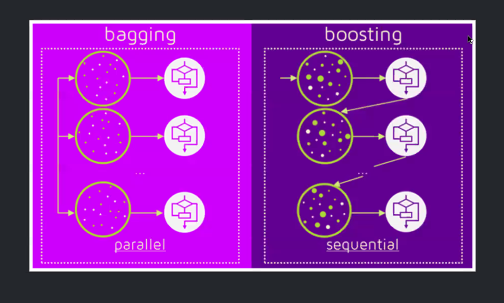

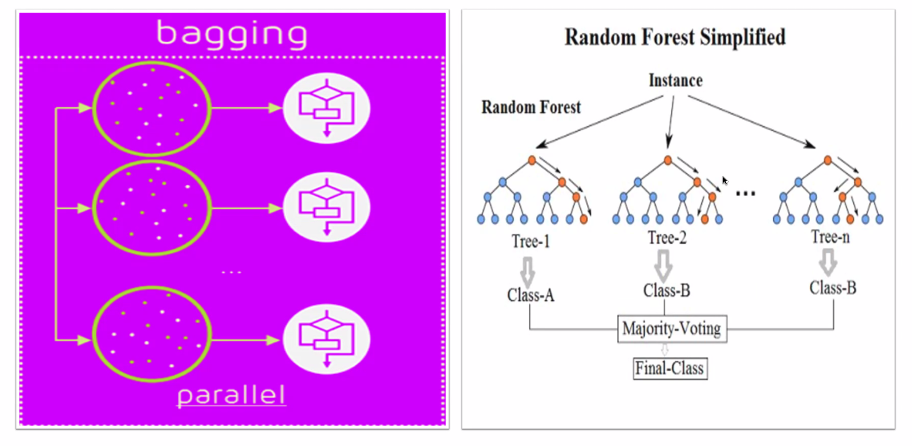

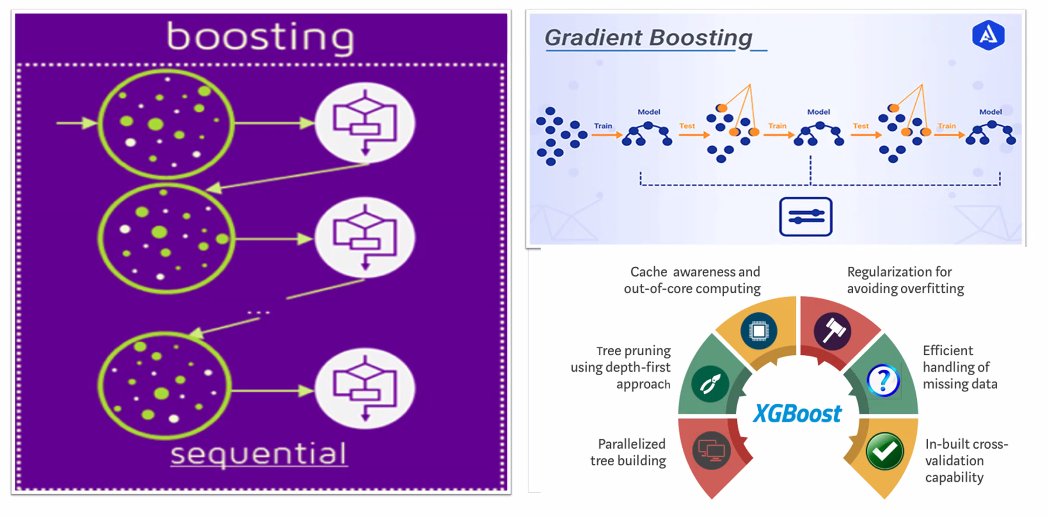

# 단순가중평균

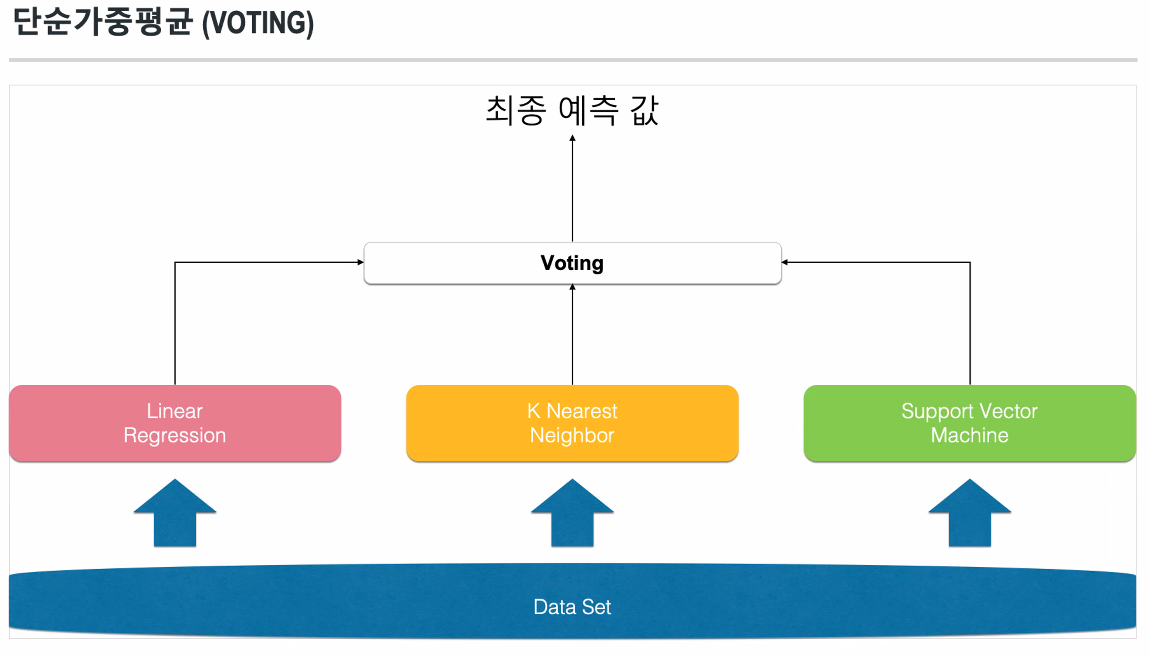

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Simple Preprocessing

df = pd.read_csv('/content/drive/MyDrive/ Encore Prac/titanic_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/ Encore Prac/titanic_test.csv')
df1 = df.copy()
df1.set_index('PassengerId', inplace=True)
df_test.set_index('PassengerId', inplace=True)
df1.drop(['Name'], axis=1, inplace=True)
df_test.drop(['Name'], axis=1, inplace=True)

df_test.Cabin.astype(str)

# 결측치 처리
df1.Cabin.fillna('N', inplace=True)
df1.Embarked.fillna('S', inplace=True)
df1.Age.fillna(df1.Age.median(), inplace=True)
df_test.Cabin.fillna('N', inplace=True)
df_test.Fare.fillna(df1.Fare.median(), inplace=True)
df_test.Age.fillna(df1.Age.median(), inplace=True)

df1.Cabin = df1.Cabin.apply(lambda x:x[0])
df_test.Cabin = df_test.Cabin.apply(lambda x:x[0])

# 인코딩
og_columns = df1.columns[(df1.dtypes=='O')|(df1.dtypes=='category')|(df1.dtypes=='bool')]
og_columns

for i in og_columns:
    globals()[f'df1_{i}_encoder'] = LabelEncoder()
    globals()[f'df1_{i}_encoder'].fit(df1[i])
    globals()[f'df_kg_{i}_encoder'] = LabelEncoder()
    globals()[f'df_kg_{i}_encoder'].fit(df_test[i])
    df1[i] = globals()[f'df1_{i}_encoder'].transform(df1[i])
    df_test[i] = globals()[f'df_kg_{i}_encoder'].transform(df_test[i])

# X, y 분리
X = df1.drop('Survived', axis=1)
y = df1.Survived

# train, test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=19)

In [7]:
knn = KNeighborsClassifier()
lr = LogisticRegression()
svc = SVC()
voting_model = VotingClassifier(estimators=[('knn', knn), ('lr', lr), ('svc', svc)],
                                voting='sofgt')

In [8]:
logistic_regression = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=8)
voting_model = VotingClassifier(estimators=[ ('LogisticRegression', logistic_regression),
                                            ('KNN', knn) ], voting='soft')
classifiers = [logistic_regression, knn]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))
voting_model.fit(X_train, y_train)
pred = voting_model.predict(X_test)
print('보팅 분류기의 정확도: {0: .4f}'.format(accuracy_score(y_test, pred)))

LogisticRegression 정확도: 0.8667
KNeighborsClassifier 정확도: 0.7333
보팅 분류기의 정확도:  0.8444


# Bagging ( Random forest Simplified)

### Bias and Variance

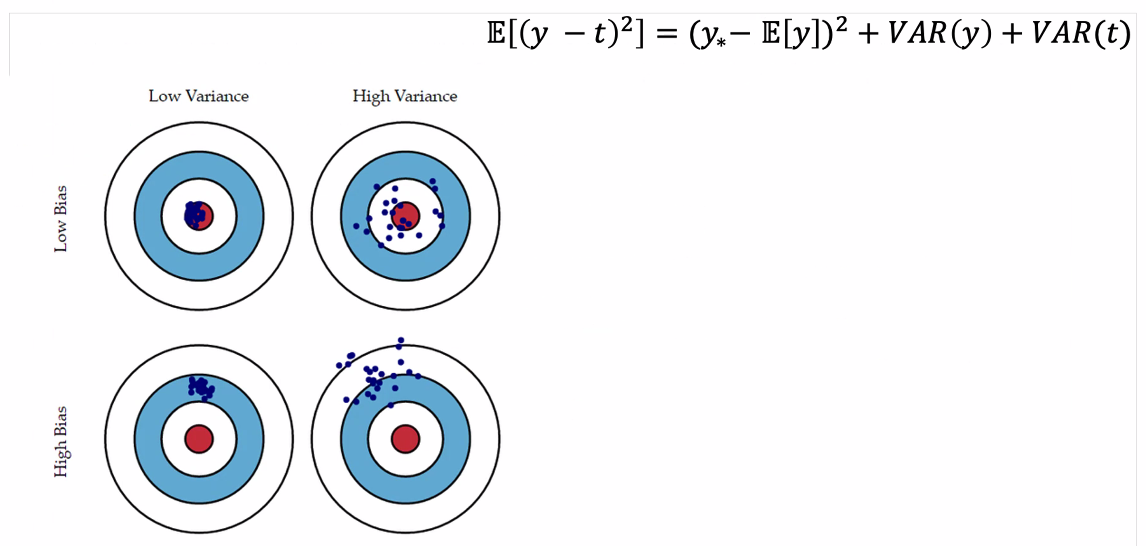

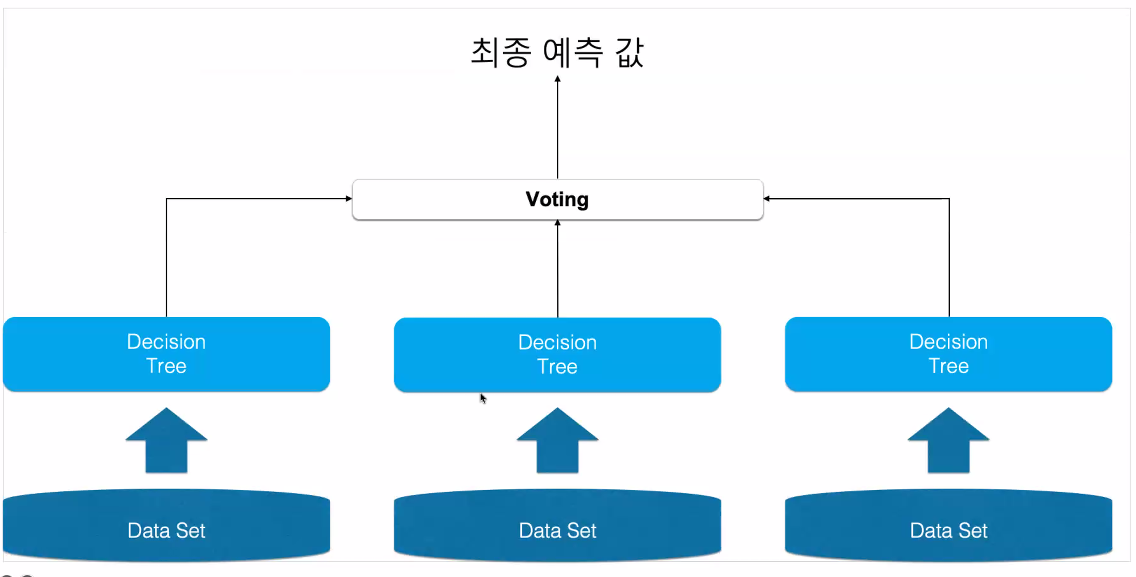

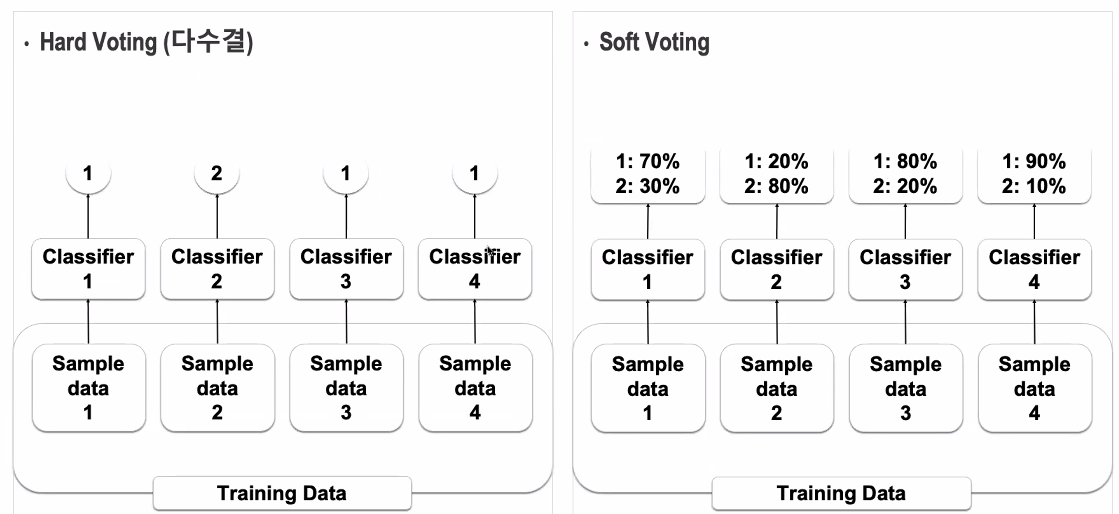

In [9]:
rf = RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors=8)
voting_model = VotingClassifier(estimators=[ ('RF', rf),
                                            ('KNN', knn) ], voting='soft')
classifiers = [rf, knn]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))
voting_model.fit(X_train, y_train)
pred = voting_model.predict(X_test)
print('보팅 분류기의 정확도: {0: .4f}'.format(accuracy_score(y_test, pred)))

RandomForestClassifier 정확도: 0.8778
KNeighborsClassifier 정확도: 0.7333
보팅 분류기의 정확도:  0.9000


In [10]:
rf = BaggingClassifier()
knn = KNeighborsClassifier(n_neighbors=10,)
voting_model = VotingClassifier(estimators=[ ('RF', rf),
                                            ('KNN', knn) ], voting='soft')
classifiers = [rf, knn]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))
voting_model.fit(X_train, y_train)
pred = voting_model.predict(X_test)
print('보팅 분류기의 정확도: {0: .4f}'.format(accuracy_score(y_test, pred)))

BaggingClassifier 정확도: 0.8444
KNeighborsClassifier 정확도: 0.7222
보팅 분류기의 정확도:  0.8889


In [ ]:
# kaggle 채점파일 생성
predict = voting_model.predict(df_test)
tit = pd.read_csv('/content/drive/MyDrive/ Encore Prac/titanic_test.csv')
submission = pd.DataFrame({
        "PassengerId": tit["PassengerId"],
        "Survived": predict
    })
submission.to_csv('submission.csv', index=False)

## 장단점
* 장점: 대부분의 데이터에서 모델 성능이 좋음, 변수가 굉장히 많은 데이터 학습에 용이
* 단점: bgging이 bias를 줄이기는 어렵다, overfitting 이슈

## 배깅(bagging, bootstrap aggregating)과 페이스팅(pasting)

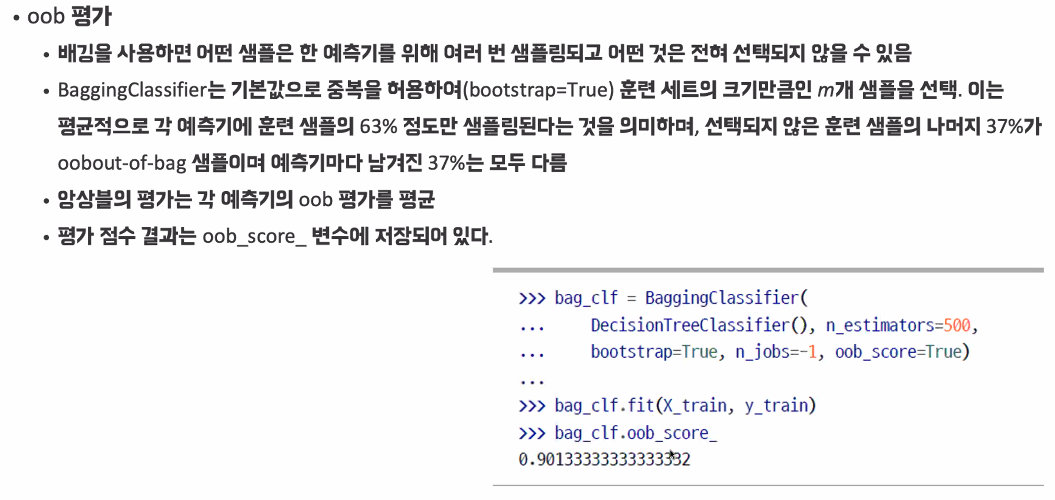

* 엑스트라 트리(익스트림 랜덤 트리 앙상블)
 * ExtraTreeclassifier 사용
 * 극단적으로 무작위한 트리의 랜덤 포레스트
 * 평향이 늘어나지만 대신 분산을 낮춤
* 특성 중요도
 * 랜덤포레스트의 또다른 장점은 특성의 상대적 중요도를 측정하기 쉽다는 점
 * 사이킷런은 훈련이 끝난 뒤 특성마다 자동으로 중요도의 전체합이 1이 되도록 결과값을 

*  bootstrap=False max_samples=1.0

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

dt_clf = BaggingClassifier(max_features=0.1, bootstrap_features=True)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy_score(y_test, pred)

0.6888888888888889

In [16]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(RandomForestClassifier(max_depth=5, n_estimators= 1000), oob_score=True)
bag_clf.fit(X_train, y_train)
pred = bag_clf.predict(X_test)
bag_clf.oob_score_

0.8039950062421972

In [17]:
rf = BaggingClassifier(RandomForestClassifier(max_depth=5, n_estimators= 1000))
knn = KNeighborsClassifier(n_neighbors=10,)
voting_model = VotingClassifier(estimators=[ ('RF', rf),
                                            ('KNN', knn) ], voting='soft')
classifiers = [rf, knn]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))
voting_model.fit(X_train, y_train)
pred = voting_model.predict(X_test)
print('보팅 분류기의 정확도: {0: .4f}'.format(accuracy_score(y_test, pred)))

BaggingClassifier 정확도: 0.8556
KNeighborsClassifier 정확도: 0.7222
보팅 분류기의 정확도:  0.8333


* 종합해서 voting

In [18]:
dt_clf1 = DecisionTreeClassifier()
dt_clf1.fit(X, y)
dt_hat1 = dt_clf1.predict(df_test)
result_df = pd.DataFrame({'dt1':dt_hat1})
result_df.index = list(range(892, 892 + result_df.shape[0]))

In [19]:
dt_clf2 = DecisionTreeClassifier(ccp_alpha=0.01)
dt_clf2.fit(X, y)
dt_hat2 = dt_clf2.predict(df_test)
result_df['dt2'] = dt_hat2

In [20]:
dt_clf3 = DecisionTreeClassifier(max_depth=5)
dt_clf3.fit(X, y)
dt_hat3 = dt_clf3.predict(df_test)
result_df['dt3'] = dt_hat3

In [21]:
dt_clf4 = DecisionTreeClassifier(min_samples_split=5)
dt_clf4.fit(X, y)
dt_hat4 = dt_clf4.predict(df_test)
result_df['dt4'] = dt_hat4

In [22]:
bg_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                           n_estimators=500, bootstrap=True, n_jobs=4, oob_score=True)
bg_clf.fit(X, y)
print(bg_clf.oob_score_)
bg_hat = bg_clf.predict(df_test)
result_df['bg1'] = bg_hat

0.835016835016835


In [25]:
rf_clf  = RandomForestClassifier(n_estimators=2000, bootstrap=True, max_samples=0.5,
                                 max_depth=7, n_jobs=4, oob_score=True)
rf_clf.fit(X, y)
print(rf_clf.oob_score_)
rf_hat = rf_clf.predict(df_test)
result_df['rf'] = rf_hat

0.8327721661054994


In [26]:
rf_clf1  = RandomForestClassifier(n_estimators=2000, bootstrap=True, max_samples=0.2,
                                 ccp_alpha=0.05, n_jobs=4, oob_score=True)
rf_clf1.fit(X, y)
print(rf_clf1.oob_score_)
rf_hat1 = rf_clf1.predict(df_test)
result_df['rf1'] = rf_hat1

0.7654320987654321


In [27]:
et_clf  = ExtraTreesClassifier(n_estimators=500, bootstrap=True, n_jobs=4, oob_score=True)
et_clf.fit(X, y)
print(et_clf.oob_score_)
et_hat = et_clf.predict(df_test)
result_df['et'] = et_hat

0.8237934904601572


In [28]:
et_clf1  = ExtraTreesClassifier(n_estimators=100, min_samples_split=10, bootstrap=False, n_jobs=4)
et_clf1.fit(X, y)
et_hat1 = et_clf1.predict(df_test)
result_df['et1'] = et_hat1

In [29]:
knn_clf_5 = KNeighborsClassifier(n_neighbors=5)
knn_clf_10 = KNeighborsClassifier(n_neighbors=10)
knn_clf_20 = KNeighborsClassifier(n_neighbors=20)
knn_clf_30 = KNeighborsClassifier(n_neighbors=30)
knn_clf_40 = KNeighborsClassifier(n_neighbors=40)
knn_clf_5.fit(X, y)
knn_clf_10.fit(X, y)
knn_clf_20.fit(X, y)
knn_clf_30.fit(X, y)
knn_clf_40.fit(X, y)
result_df['knn5'] = knn_clf_5.predict(df_test)
result_df['knn10'] = knn_clf_10.predict(df_test)
result_df['knn20'] = knn_clf_20.predict(df_test)
result_df['knn30'] = knn_clf_30.predict(df_test)
result_df['knn40'] = knn_clf_40.predict(df_test)

In [30]:
lr_clf  = LogisticRegression(C=0.05)
lr_clf.fit(X, y)
result_df['lr'] = lr_clf.predict(df_test)

In [31]:
svm_clf = SVC(probability=True, kernel='rbf')
svm_clf1 = SVC(probability=True, kernel='poly')
svm_clf2 = SVC(probability=True, kernel='sigmoid')
svm_clf.fit(X, y)
svm_clf1.fit(X, y)
svm_clf2.fit(X, y)
result_df['svm'] = svm_clf.predict(df_test)
result_df['svm1'] = svm_clf1.predict(df_test)
result_df['svm2'] = svm_clf2.predict(df_test)

In [32]:
result_df.corr()

,dt1,dt2,dt3,dt4,bg1,rf,rf1,et,et1,knn5,knn10,knn20,knn30,knn40,lr,svm,svm1,svm2
dt1,1.000000,0.530651,0.624035,0.844064,0.636574,0.575489,0.515641,0.529769,0.505207,0.130028,0.151821,0.141422,0.188500,0.192769,0.499600,0.172199,0.096776,-0.107318
dt2,0.530651,1.000000,0.802298,0.533861,0.753046,0.869158,0.931487,0.738600,0.742537,-0.001136,0.044659,0.051094,0.050243,0.044897,0.836341,0.077376,0.098996,0.027164
dt3,0.624035,0.802298,1.000000,0.631695,0.766320,0.806130,0.746722,0.748274,0.746008,0.132876,0.182813,0.183996,0.167163,0.169716,0.808589,0.258722,0.102841,-0.131815
dt4,0.844064,0.533861,0.631695,1.000000,0.680966,0.609670,0.518643,0.595210,0.569341,0.129479,0.168550,0.169817,0.207313,0.199813,0.494392,0.192895,0.101964,-0.076867
bg1,0.636574,0.753046,0.766320,0.680966,1.000000,0.811761,0.736903,0.784571,0.811130,0.124805,0.195557,0.164819,0.147762,0.144554,0.655465,0.256316,0.098017,-0.118228
rf,0.575489,0.869158,0.806130,0.609670,0.811761,1.000000,0.863798,0.825113,0.853604,0.096146,0.130481,0.181900,0.174586,0.149557,0.831103,0.184456,0.127280,-0.004794
rf1,0.515641,0.931487,0.746722,0.518643,0.736903,0.863798,1.000000,0.723319,0.736903,0.013089,0.047512,0.065734,0.064663,0.059402,0.800137,0.091722,0.099981,0.034328
et,0.529769,0.738600,0.748274,0.595210,0.784571,0.825113,0.723319,1.000000,0.876726,0.132311,0.174050,0.164980,0.173975,0.163843,0.708395,0.280606,0.080379,-0.112072
et1,0.505207,0.742537,0.746008,0.569341,0.811130,0.853604,0.736903,0.876726,1.000000,0.135584,0.207383,0.223144,0.226087,0.201611,0.738127,0.277787,0.129317,-0.096959
knn5,0.130028,-0.001136,0.132876,0.129479,0.124805,0.096146,0.013089,0.132311,0.135584,1.000000,0.571613,0.476794,0.418021,0.417068,0.117875,0.481747,0.241989,-0.230562


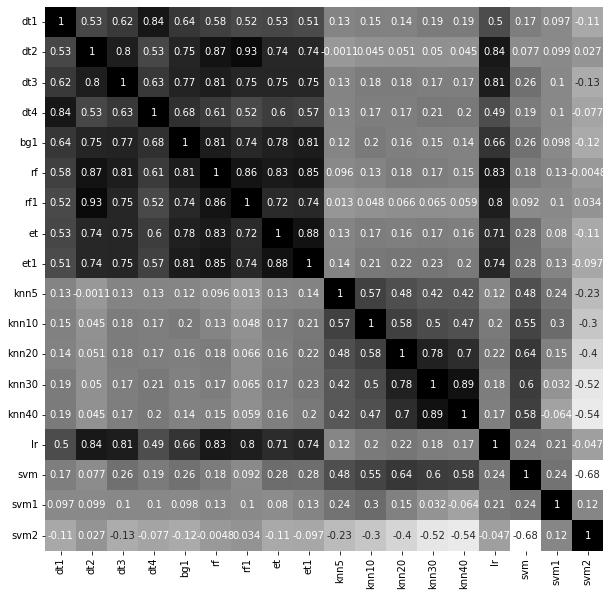

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(result_df.corr(),annot=True, cbar=False, cmap='binary')
plt.show()

In [38]:
clfs = [('dt1', dt_clf1), ('dt2', dt_clf2), ('dt3', dt_clf3), ('dt4', dt_clf4), 
        ('rf', rf_clf), ('rf1', rf_clf1), 
        ('et', et_clf), ('et1', et_clf1),
        ('knn5', knn_clf_5), ('knn10', knn_clf_10), ('knn20', knn_clf_20),
        ('knn30', knn_clf_30), ('knn40', knn_clf_40),
        ('lr', lr_clf),
        ('svm', svm_clf), ('svm1', svm_clf1), ('svm2', svm_clf2)]
pd.DataFrame(clfs, columns=['model', 'params'])

,model,params
0,dt1,DecisionTreeClassifier()
1,dt2,DecisionTreeClassifier(ccp_alpha=0.01)
2,dt3,DecisionTreeClassifier(max_depth=5)
3,dt4,DecisionTreeClassifier(min_samples_split=5)
4,rf,"(DecisionTreeClassifier(max_depth=7, max_featu..."
5,rf1,"(DecisionTreeClassifier(ccp_alpha=0.05, max_fe..."
6,et,"(ExtraTreeClassifier(random_state=1221384537),..."
7,et1,"(ExtraTreeClassifier(min_samples_split=10, ran..."
8,knn5,KNeighborsClassifier()
9,knn10,KNeighborsClassifier(n_neighbors=10)


In [39]:
from sklearn.ensemble import VotingClassifier
vo_clf = VotingClassifier(estimators=clfs, voting='soft')
vo_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()),
                             ('dt2', DecisionTreeClassifier(ccp_alpha=0.01)),
                             ('dt3', DecisionTreeClassifier(max_depth=5)),
                             ('dt4',
                              DecisionTreeClassifier(min_samples_split=5)),
                             ('rf',
                              RandomForestClassifier(max_depth=7,
                                                     max_samples=0.5,
                                                     n_estimators=2000,
                                                     n_jobs=4,
                                                     oob_score=True)),
                             ('rf1',
                              RandomForestClassifier(ccp_alpha=0.05...
                             ('knn10', KNeighborsClassifier(n_neighbors=10)),
                             ('knn20', KNeighborsClassifier(n_neighbors=20)),
                            

In [40]:
vo_clf.score(X_test, y_test)

0.8555555555555555

In [ ]:
predict = vo_clf.predict(df_test)
tit = pd.read_csv('/content/drive/MyDrive/ Encore Prac/titanic_test.csv')
submission = pd.DataFrame({
        "PassengerId": tit["PassengerId"],
        "Survived": predict
    })
submission.to_csv('new_sub.csv', index=False)

## Freture_importances

# Boosting

## GBM (Gradient Boosting Machine)

* Adaboost (Adaptive Boosting) 보다 정교화된 모델

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [42]:
gb_clf  = GradientBoostingClassifier(ccp_alpha= 0.011001332269966666, learning_rate= 0.1, loss= 'exponential', max_depth= 8,
                                    max_features='log2',
                                    min_impurity_decrease= 0.8671820004771132,
                                    min_samples_leaf= 28,
                                    min_samples_split= 0.32582763423323347,
                                    n_estimators=300)
gb_clf .fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)

In [43]:
accuracy_score(y_test, gb_pred)

0.8555555555555555

In [44]:
from sklearn.metrics import accuracy_score
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK

def gbm_objective(search_space):
    model = GradientBoostingClassifier(**search_space)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return {'loss': -accuracy, 'status': STATUS_OK}

# new search space
search_space={'loss':hp.choice('loss', ['deviance', 'exponential']),
              'max_depth':hp.choice('max_depth', range(2, 10)),
              'min_samples_split':hp.uniform('min_samples_split', 0.1, 1),
              'min_samples_leaf':hp.choice('min_samples_leaf', range(1, 30)),
              'max_features':hp.choice('max_features', [None, 'sqrt', 'log2']),
              'min_impurity_decrease':hp.uniform('min_impurity_decrease', 0.1, 1),
              'ccp_alpha':hp.uniform('ccp_alpha', 0.01, 1),
              'learning_rate':hp.choice('learning_rate', [0.1, 0.01]),
              'n_estimators':hp.choice('n_estimators', [100, 200, 300, 400, 500,1000])}

# set the hyperparam tuning algorithm
algorithm=tpe.suggest
# implement Hyperopt
best_params = fmin(fn=gbm_objective,
                   space=search_space,
                   algo=algorithm,
                   max_evals=500)

params1 = space_eval(search_space, best_params)

100%|██████████| 500/500 [03:12<00:00,  2.60it/s, best loss: -0.8777777777777778]


In [45]:
params1

{'ccp_alpha': 0.010069424787301209,
 'learning_rate': 0.1,
 'loss': 'exponential',
 'max_depth': 7,
 'max_features': None,
 'min_impurity_decrease': 0.7128681450387548,
 'min_samples_leaf': 18,
 'min_samples_split': 0.4541025613881501,
 'n_estimators': 200}

In [46]:
best_gbm_clf = GradientBoostingClassifier(**params1)
best_gbm_clf.fit(X_train, y_train)
best_gbm_clf.score(X_test, y_test)

0.8777777777777778

In [47]:
best_gbm_clf.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.010069424787301209, loss='exponential',
                           max_depth=7,
                           min_impurity_decrease=0.7128681450387548,
                           min_samples_leaf=18,
                           min_samples_split=0.4541025613881501,
                           n_estimators=200)

In [49]:
predict = best_gbm_clf.predict(df_test)
tit = pd.read_csv('/content/drive/MyDrive/ Encore Prac/titanic_test.csv')
submission = pd.DataFrame({
        "PassengerId": tit["PassengerId"],
        "Survived": predict
    })
submission.to_csv('submission.csv', index=False)

## XGBoost

* XGBoost 설치
 * conda install -c anaconda py-xgboost
 * import xgboost as xgb
 * from xgboost import XGBClassifier
 

In [50]:
from xgboost import XGBClassifier

In [51]:
from xgboost.callback import early_stop
xgb = XGBClassifier(max_depth=5, n_estimators=800, loss='exponential', early_stop=60)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
accuracy_score(y_test, xgb_pred)

0.8

In [52]:
from sklearn.metrics import accuracy_score
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK

def gbm_objective(search_space):
    model = XGBClassifier(**search_space)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return {'loss': -accuracy, 'status': STATUS_OK}

# new search space
search_space={'loss':hp.choice('loss', ['deviance', 'exponential']),
              'max_depth':hp.choice('max_depth', range(2, 10)),
              'min_samples_split':hp.uniform('min_samples_split', 0.1, 1),
              'min_samples_leaf':hp.choice('min_samples_leaf', range(1, 30)),
              'max_features':hp.choice('max_features', [None, 'sqrt', 'log2']),
              'min_impurity_decrease':hp.uniform('min_impurity_decrease', 0.1, 1),
              'ccp_alpha':hp.uniform('ccp_alpha', 0.01, 1),
              'learning_rate':hp.choice('learning_rate', [0.1, 0.01]),
              'n_estimators':hp.choice('n_estimators', [100, 200, 300, 400, 500,1000]),
              'early_stop': hp.choice('early_stop', range(20, 100))}

# set the hyperparam tuning algorithm
algorithm=tpe.suggest
# implement Hyperopt
best_params = fmin(fn=gbm_objective,
                   space=search_space,
                   algo=algorithm,
                   max_evals=500)

params1 = space_eval(search_space, best_params)

100%|██████████| 500/500 [02:34<00:00,  3.24it/s, best loss: -0.9]


In [53]:
params1

{'ccp_alpha': 0.6404106768253913,
 'early_stop': 53,
 'learning_rate': 0.01,
 'loss': 'deviance',
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_impurity_decrease': 0.49629902869633047,
 'min_samples_leaf': 17,
 'min_samples_split': 0.8351347275765372,
 'n_estimators': 100}

In [54]:
best_xgb_clf = XGBClassifier(**params1)
best_xgb_clf.fit(X_train, y_train)
best_xgb_clf.score(X_test, y_test)

0.9

In [55]:
predict = best_xgb_clf.predict(df_test)
tit = pd.read_csv('/content/drive/MyDrive/ Encore Prac/titanic_test.csv')
submission = pd.DataFrame({
        "PassengerId": tit["PassengerId"],
        "Survived": predict
    })
submission.to_csv('submission.csv', index=False)

* 데이터 수가 적으면 XGBoost, 많으면 LGBM (1만개 기준)

In [56]:
# HistGBM
from sklearn.ensemble import HistGradientBoostingClassifier

In [57]:
hgbm_clf = HistGradientBoostingClassifier(learning_rate=0.1, max_depth=5, 
                                          min_samples_leaf=20, max_bins=255, random_state=None)
hgbm_clf.fit(X_train, y_train)
hgbm_pred = hgbm_clf.predict(X_test)
accuracy_score(y_test, hgbm_pred)

0.8777777777777778

In [58]:
from sklearn.metrics import accuracy_score
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK

def gbm_objective(search_space):
    model = HistGradientBoostingClassifier(**search_space)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return {'loss': -accuracy, 'status': STATUS_OK}

# new search space
search_space={'loss':hp.choice('loss', ['auto', 'binary_crossentropy']),
              'max_depth':hp.choice('max_depth', range(2, 15)),
              'max_iter' : hp.choice('mix_iter', range(100, 500)),
              'max_leaf_nodes':hp.choice('min_samples_leaf', range(2, 30)),
              'learning_rate':hp.choice('learning_rate', [0.1, 0.01])}

# set the hyperparam tuning algorithm
algorithm=tpe.suggest
# implement Hyperopt
best_params = fmin(fn=gbm_objective,
                   space=search_space,
                   algo=algorithm,
                   max_evals=500)

params1 = space_eval(search_space, best_params)

100%|██████████| 500/500 [04:18<00:00,  1.93it/s, best loss: -0.9111111111111111]


In [59]:
params1

{'learning_rate': 0.1,
 'loss': 'auto',
 'max_depth': 8,
 'max_iter': 199,
 'max_leaf_nodes': 7}

In [60]:
best_hgbm_clf = HistGradientBoostingClassifier(**params1)
best_hgbm_clf.fit(X_train, y_train)
best_hgbm_clf.score(X_test, y_test)

0.9111111111111111

# UnderSampling, OverSampling

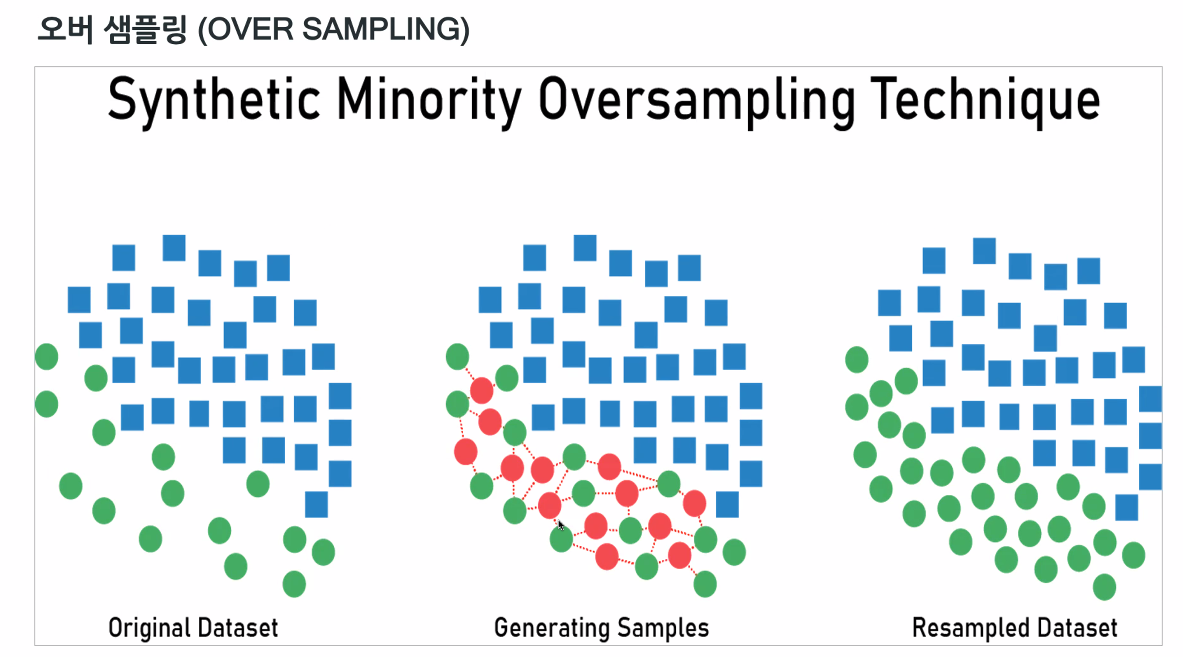

* 데이터의 개수는 많아지지만 성능이 올라간다고 보장할 수 없음

In [61]:
from imblearn.over_sampling import SMOTE

# 모델 설정
sm = SMOTE(sampling_strategy='auto',
           random_state=10,
           k_neighbors=5,
           n_jobs=4)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

In [62]:
new_Xtrain = pd.concat([X_train, X_resampled], axis = 0)
new_Ytrain = pd.concat([y_train, y_resampled], axis = 0)

In [63]:
rf_clf = RandomForestClassifier(random_state=0, n_estimators= 200, criterion = 'gini',max_features = 'auto',max_depth = 8)
rf_clf.fit(new_Xtrain, new_Ytrain)
rf_pred = rf_clf.predict(X_test)
accuracy_score(y_test, pred)

0.8333333333333334

# Stacking

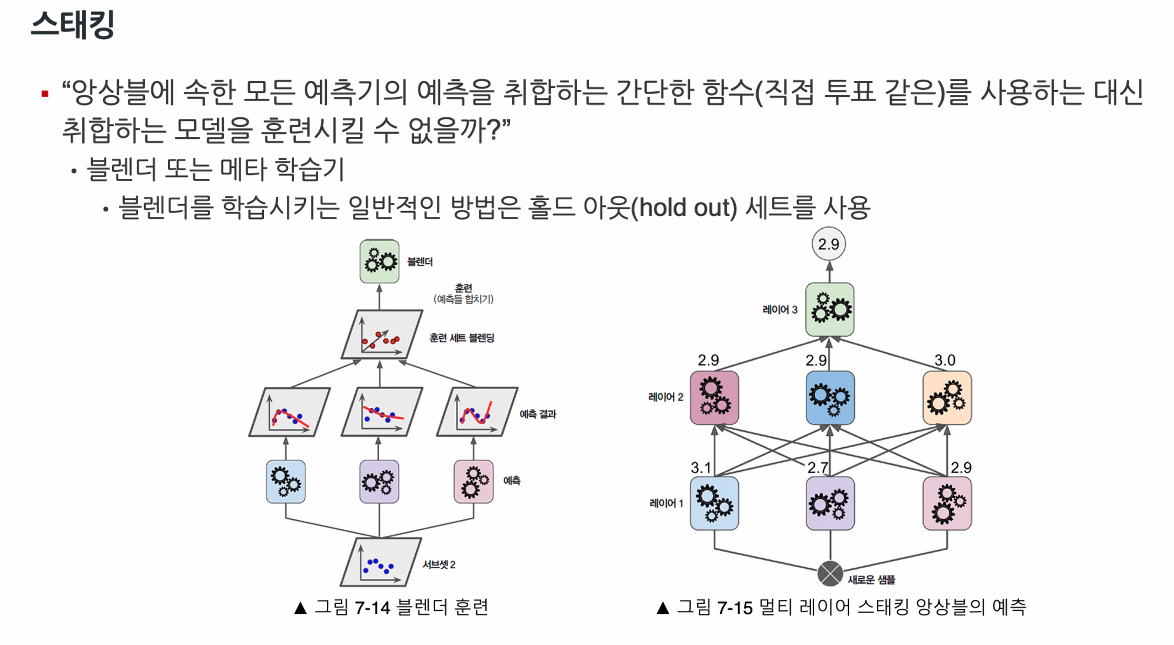

In [67]:
dec = DecisionTreeClassifier()
xgb = XGBClassifier()
et = ExtraTreesClassifier(n_estimators=300,
    max_depth=10,
    bootstrap=True,
    n_jobs=-1,
    max_samples=1.0)
rf = RandomForestClassifier(n_estimators=500,n_jobs=-1,max_samples=1.0)
his = HistGradientBoostingClassifier(max_depth=5)
lr = LogisticRegression()

dec.fit(X,y)
xgb.fit(X,y)
et.fit(X,y)
lr.fit(X,y)
his.fit(X,y)

dec_pred = dec.predict(X_test)
xgb_pred = xgb.predict(X_test)
et_pred = et.predict(X_test)
lr_pred = lr.predict(X_test)
his_pred = his.predict(X_test)
pred  = np.array([dec_pred, xgb_pred, et_pred, lr_pred, his_pred])
pred = np.transpose(pred) # 행 열 위치 교환
pred_df1 = pd.DataFrame(pred, columns=['dec_pred', 'xgb_pred', 'et_pred', 'lr_pred', 'his_pred'])
pred_df1

,dec_pred,xgb_pred,et_pred,lr_pred,his_pred
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,1,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
85,1,0,1,0,0
86,0,0,0,0,0
87,1,1,1,1,1
88,0,0,0,0,0


In [68]:
dc_final = RandomForestClassifier()
dc_final.fit(pred, y_test)
final = dc_final.predict(pred)
accuracy_score(y_test, final)

1.0

In [69]:
dec_pred = dec.predict(df_test)
xgb_pred = xgb.predict(df_test)
et_pred = et.predict(df_test)
lr_pred = lr.predict(df_test)
his_pred = his.predict(df_test)

In [70]:
pred = np.array([dec_pred, xgb_pred, et_pred, lr_pred, his_pred]).T
predict = dc_final.predict(pred)
tit = pd.read_csv('/content/drive/MyDrive/ Encore Prac/titanic_test.csv')
submission = pd.DataFrame({
        "PassengerId": tit["PassengerId"],
        "Survived": predict
    })
submission.to_csv('submission.csv', index=False)